In [17]:
import preprocessing
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestNeighbors
import pickle, os
from config import TWITTER_DATA_DIR
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ls ../data/twitter-coordination-src/data

campaign_tweets_new.pkl
campaign_tweets.pkl
cascade_root_embeddings.pkl
cascade_root_ids_2.pkl
cascade_root_ids.pkl
case_tweets.pkl
clustering_labels_epsilon_0_pca_70.pkl
clustering_labels_epsilon_25_pca_70.pkl
exposure_results.pkl
hashtags.csv
missing_data/
name_changes.pkl
neighbors_results_2.pkl
neighbors_results.pkl
new_profiles.pkl
non_template_cascade_tweets_with_rt_counts.pkl
sample/
temp_exposure_results.pkl
temp_tweets
total_campaign.pkl
trends/
tweets_v9/
unique_tweet_embeddings_2.pkl
unique_tweet_embeddings.pkl
users_latlong.txt
users.pkl


In [58]:
with open(os.path.join(TWITTER_DATA_DIR, 'neighbors_results.pkl'), 'rb') as f:
    result_dict = pickle.load(f)
    
with open(os.path.join(TWITTER_DATA_DIR, 'neighbors_results_2.pkl'), 'rb') as f:
    result_dict.update(pickle.load(f))


In [59]:
result_dict.keys()

dict_keys(['jharkhandwithmodi', 'surgingsilk', 'merapmmeraabhimaan', 'kiamadeinap', 'dousupportnaxals', 'mizoramwithmodi', 'timesofrahul', 'threadsofexcellence', 'msmetextilesconclave', 'bjp4jind', 'म्हारा_वोट_भाजपा_को', 'parakramparv', 'technicaltextiles', 'himachalkacu', 'congaapbhaibhai', 'sizeindia', 'savekeralafromcommunists', 'copypastencp', 'bjp4betterandhra', 'jaihindkisena', 'congressinsultsairforce', 'armedforcesweek2018', 'bogibeelbridge', 'newindia4narishakti', 'congressdefencescams', 'hooghly_chalo', 'pminprayagraj', 'goodgovernanceday', 'amethikididismritiirani', 'namowithtraders', 'corruptcongressfearsdemo', 'artisanspeak', 'indiabolemodidobara', 'urban_नक्सली_केजरीवाल', 'zamanatke1000din', 'yuvakemannkibaat', 'congressframedamitshah', 'mainbhichowkidar', 'iafbacksrafale', 'भारत_माता_की_जय', 'namothon', 'लक्ष्य_हमारा_मोदी_दोबारा', 'congressagainstnationalsecurity', 'आदर्शघोटाला_संघर्ष_यात्रा', 'pminraebareli', 'bjpforsamridhkisan', 'facebookboomed', 'badalrahihaikashi', 

In [10]:
res = result_dict['jharkhandwithmodi']

In [14]:
res['n_neighbors']

371

In [12]:
res.keys()

dict_keys(['unique_tweets', 'len_unique_tweets', 'len_unique_templates', 'len_total_templates', 'n_neighbors', 'template_n_template_neighbors', 'normal_n_template_neighbors', 'global_pct_temp'])

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF


In [29]:
def process_results(res):
    N_NEIGHBORS = res['n_neighbors']
    templates = res['template_n_template_neighbors']
    normals = res['normal_n_template_neighbors']
    global_pct_temp = res['global_pct_temp']
    
    temp_pcts = np.array(templates)/N_NEIGHBORS
    norm_pcts = np.array(normals)/N_NEIGHBORS
    plt.hist([temp_pcts, norm_pcts], label=['Templates', 'Non-Templates'], bins=20, density=True)
    plt.plot([global_pct_temp, global_pct_temp], [0,3], 'black', label='HT-wide Percent Template', linewidth=5, markersize=50)
    plt.legend()
    plt.title('% of Nearest Neighbors that are Templates')
    plt.xlabel('% of Nearest Neighbors that are Templates')

        
    print('average % template of template neighbors', np.mean(temp_pcts))
    print('average % template of normal neighbors', np.mean(norm_pcts))
    print('% of tweets that are templates', np.mean(global_pct_temp))

average % template of template neighbors 0.5990295258107141
average % template of normal neighbors 0.2778949995970305
% of tweets that are templates 0.35172970790146724


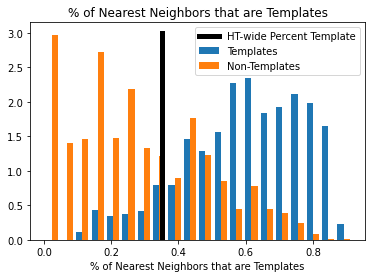

In [19]:
process_results(res)

In [42]:
def process_results_ecdf(res, norm=False, nolabel=False):
    # if norm, normalize 
    N_NEIGHBORS = res['n_neighbors']
    templates = res['template_n_template_neighbors']
    normals = res['normal_n_template_neighbors']
    global_pct_temp = res['global_pct_temp']
    
    temp_pcts = np.array(templates)/N_NEIGHBORS
    norm_pcts = np.array(normals)/N_NEIGHBORS
    if norm:
        temp_pcts /= global_pct_temp
        norm_pcts /= global_pct_temp
    ecdf_temp = ECDF(temp_pcts)
    ecdf_norm = ECDF(norm_pcts)
    plt.plot(ecdf_temp.x, ecdf_temp.y, label='Templates')
    plt.plot(ecdf_norm.x, ecdf_norm.y, label='Non-Templates')
    if not norm:
        plt.plot([global_pct_temp, global_pct_temp], [0,1], 'black', label='HT-wide Percent Template', linewidth=5, markersize=50)
    
    
#     plt.hist([temp_pcts, norm_pcts], label=['Templates', 'Non-Templates'], bins=20, density=True)
    if not nolabel:
        plt.legend()
    plt.title('Distribution of Template Penetration into Neigborhood')
    if norm:
        plt.xlabel('% of Template Neighbors / Total % Templates ')
    else:
        plt.xlabel('% of Nearest Neighbors that are Templates')

    print('average % template of template neighbors', np.mean(temp_pcts))
    print('average % template of normal neighbors', np.mean(norm_pcts))
    print('% of tweets that are templates', np.mean(global_pct_temp))

average % template of template neighbors 0.5990295258107141
average % template of normal neighbors 0.2778949995970305
% of tweets that are templates 0.35172970790146724


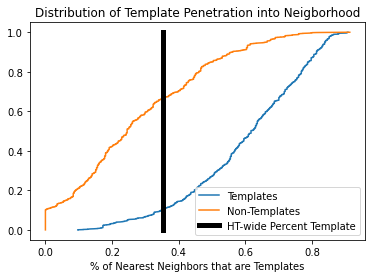

In [28]:
process_results_ecdf(res)

In [33]:
[x['len_unique_tweets'] for ht, x in result_dict.items()]

[7429,
 564,
 13727,
 2541,
 385,
 1955,
 1184,
 349,
 452,
 667,
 9366,
 6893,
 1677,
 628,
 1172,
 596,
 1661,
 334,
 2382,
 2457,
 347,
 1289,
 8799,
 11243,
 926,
 169,
 3443,
 11479,
 1189,
 3560,
 6717,
 577,
 21960,
 2169,
 1365,
 1174,
 844]

(array([12.,  7.,  4.,  3.,  2.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  1.,
         0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([  169.        ,   895.36666667,  1621.73333333,  2348.1       ,
         3074.46666667,  3800.83333333,  4527.2       ,  5253.56666667,
         5979.93333333,  6706.3       ,  7432.66666667,  8159.03333333,
         8885.4       ,  9611.76666667, 10338.13333333, 11064.5       ,
        11790.86666667, 12517.23333333, 13243.6       , 13969.96666667,
        14696.33333333, 15422.7       , 16149.06666667, 16875.43333333,
        17601.8       , 18328.16666667, 19054.53333333, 19780.9       ,
        20507.26666667, 21233.63333333, 21960.        ]),
 <BarContainer object of 30 artists>)

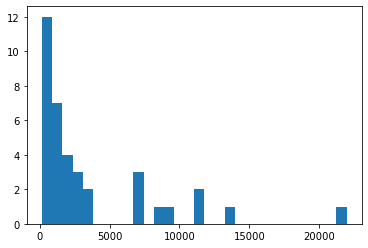

In [32]:
plt.hist([x['len_unique_tweets'] for ht, x in result_dict.items()], bins=30)

average % template of template neighbors 0.5990295258107141
average % template of normal neighbors 0.2778949995970305
% of tweets that are templates 0.35172970790146724


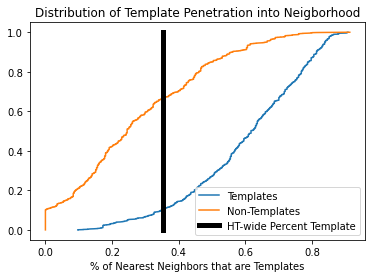

average % template of template neighbors 0.1267482397271577
average % template of normal neighbors 0.010712001769965975
% of tweets that are templates 0.12355212355212356


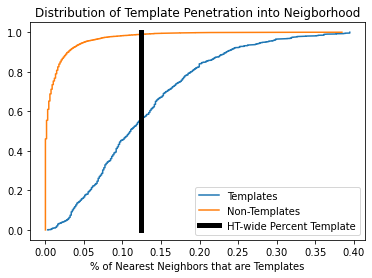

average % template of template neighbors 0.8742272877067653
average % template of normal neighbors 0.30443158918768676
% of tweets that are templates 0.3433696348494555


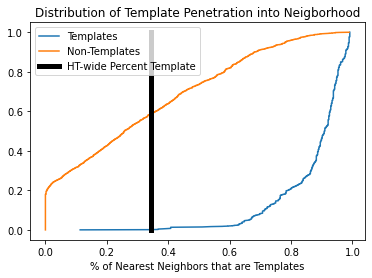

average % template of template neighbors 0.18031189083820665
average % template of normal neighbors 0.03640643424280838
% of tweets that are templates 0.04961555200928478


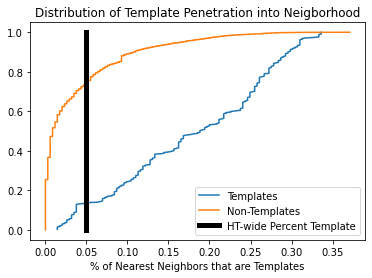

average % template of template neighbors 0.293088708312172
average % template of normal neighbors 0.05337690631808279
% of tweets that are templates 0.06102966246164337


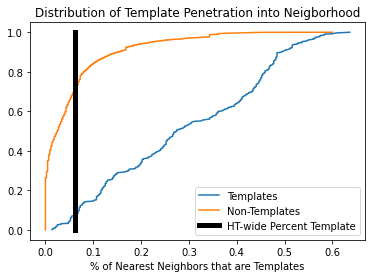

average % template of template neighbors 0.47990484295218944
average % template of normal neighbors 0.04196832009773514
% of tweets that are templates 0.1636573868184648


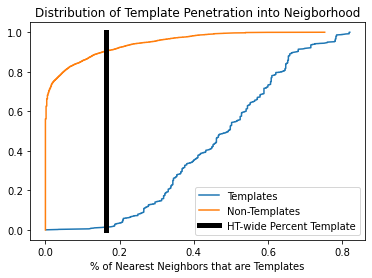

average % template of template neighbors 0.5268561979944527
average % template of normal neighbors 0.049738586922109765
% of tweets that are templates 0.25326749927388903


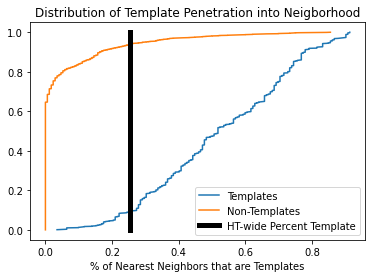

average % template of template neighbors 0.022974738675958187
average % template of normal neighbors 0.0005348217762283803
% of tweets that are templates 0.00139384963847025


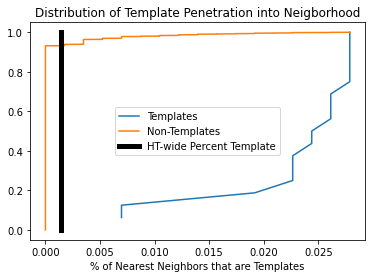

average % template of template neighbors 0.06523463317911435
average % template of normal neighbors 0.012087947619432543
% of tweets that are templates 0.023876404494382022


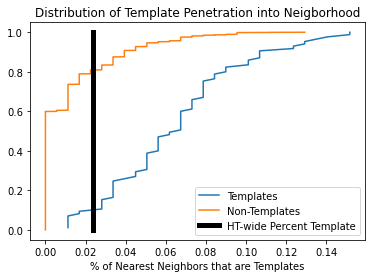

average % template of template neighbors 0.8458186463598475
average % template of normal neighbors 0.08041381358846887
% of tweets that are templates 0.3197856185797231


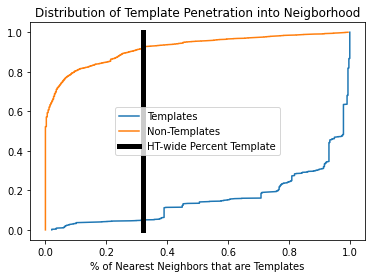

average % template of template neighbors 0.1041255696891368
average % template of normal neighbors 0.011347231911469201
% of tweets that are templates 0.021948998178506374


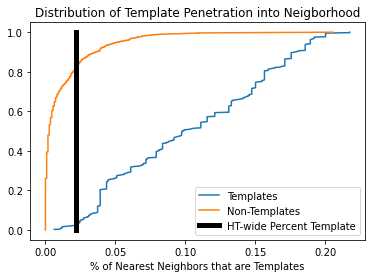

In [36]:
for ht, res in result_dict.items():
    if res['len_unique_tweets'] > 3000:
        process_results_ecdf(res)
        plt.show()

## Normalizing
That black bar is pretty ugly...
So, I have the # of neighbors that are templates and I've been dividing by number of neighbors. How can I normalize by number of templates in the dataset. 
- I could subtract the global average? Then it won't be from 0-1
- Divide by the global average. Won't be from 0 to 1 but that's ok.

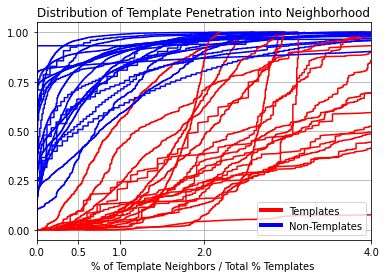

In [76]:
for ht, res in result_dict.items():
    if res['len_unique_tweets'] > 5000:       
        N_NEIGHBORS = res['n_neighbors']
        templates = res['template_n_template_neighbors']
        normals = res['normal_n_template_neighbors']
        global_pct_temp = res['global_pct_temp']

        temp_pcts = np.array(templates)/N_NEIGHBORS
        norm_pcts = np.array(normals)/N_NEIGHBORS
        temp_pcts /= global_pct_temp
        norm_pcts /= global_pct_temp
        ecdf_temp = ECDF(temp_pcts)
        ecdf_norm = ECDF(norm_pcts)
        plt.plot(ecdf_temp.x, ecdf_temp.y, label='Templates', color='r')
        plt.plot(ecdf_norm.x, ecdf_norm.y, label='Non-Templates', color='b')

#plt.legend()
plt.title('Distribution of Template Penetration into Neighborhood')
plt.xlabel('% of Template Neighbors / Total % Templates ')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='r', lw=4, label='Templates'),
                   Line2D([0], [0], color='b', lw=4, label='Non-Templates')]

plt.legend(handles=legend_elements)
plt.yticks([0, .25, .5, .75, 1])
plt.xticks([0,  .5, 1, 2, 4])
plt.xlim(0, 4)
#plt.xscale('log')

plt.grid()

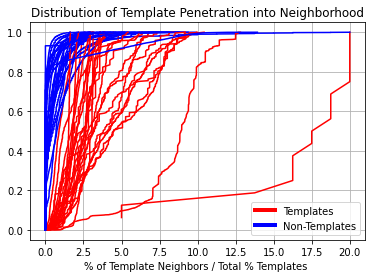

In [62]:
for ht, res in result_dict.items():
    if res['len_unique_tweets'] > 3000:       
        N_NEIGHBORS = res['n_neighbors']
        templates = res['template_n_template_neighbors']
        normals = res['normal_n_template_neighbors']
        global_pct_temp = res['global_pct_temp']

        temp_pcts = np.array(templates)/N_NEIGHBORS
        norm_pcts = np.array(normals)/N_NEIGHBORS
        temp_pcts /= global_pct_temp
        norm_pcts /= global_pct_temp
        ecdf_temp = ECDF(temp_pcts)
        ecdf_norm = ECDF(norm_pcts)
        plt.plot(ecdf_temp.x, ecdf_temp.y, label='Templates', color='r')
        plt.plot(ecdf_norm.x, ecdf_norm.y, label='Non-Templates', color='b')

#plt.legend()
plt.title('Distribution of Template Penetration into Neighborhood')
plt.xlabel('% of Template Neighbors / Total % Templates ')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='r', lw=4, label='Templates'),
                   Line2D([0], [0], color='b', lw=4, label='Non-Templates')]

plt.legend(handles=legend_elements)

plt.grid()